Денис Иванов

Итоговая работа по курсу "Математика для DS"

In [13]:
import numpy as np
from sympy import *

from scipy.misc import derivative
from scipy.optimize import minimize, approx_fprime, fmin, differential_evolution

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

Задание 1


Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [14]:

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [15]:
def cosine(x, y):
    xLength = np.linalg.norm( x )
    yLength = np.linalg.norm( y )
    return np.dot(x,y) / ( xLength * yLength)

In [16]:

for i in range(len(raitings)):
    similar = 0
    for j in range(len(raitings)):
        if i == j:
            continue
            
        x = raitings[i]
        y = raitings[j]

        cos = cosine(x, y)
            
        if cos > similar:
            similar = cos
            user = j + 1
            
    print('на пользователя', i+1, 'больше всего похож пользователь', user, ', cos = ', similar.round(4))

на пользователя 1 больше всего похож пользователь 9 , cos =  0.9107
на пользователя 2 больше всего похож пользователь 5 , cos =  0.8714
на пользователя 3 больше всего похож пользователь 10 , cos =  0.9187
на пользователя 4 больше всего похож пользователь 10 , cos =  0.8589
на пользователя 5 больше всего похож пользователь 9 , cos =  0.8795
на пользователя 6 больше всего похож пользователь 10 , cos =  0.8551
на пользователя 7 больше всего похож пользователь 4 , cos =  0.8327
на пользователя 8 больше всего похож пользователь 6 , cos =  0.8445
на пользователя 9 больше всего похож пользователь 1 , cos =  0.9107
на пользователя 10 больше всего похож пользователь 3 , cos =  0.9187


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [17]:
from sklearn.decomposition import PCA

pca  = PCA(n_components=5) 
itog = pca.fit_transform(raitings)

itog

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [18]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x + 3))**2
print(f"Первая производная на python:          {derivative(f, 1.0, dx=1e-6)}")

def f_prime(x):
    return 2 *(np.cos(x)  -  2 *np.sin(2*x+3)
           ) *(np.tan(np.sin(x)+np.cos(2*x+3))**2 + 1
           ) * np.tan(np.sin(x)+np.cos(2*x+3))

print(f"Первая производная на бумаге/ ручками: {f_prime(1)}")

Первая производная на python:          55.3859176464222
Первая производная на бумаге/ ручками: 55.385917635337854


При $x_0$ = 1

$f = (2 * (cos(1) - 2 * sin(2 * 1 + 3)) * (1 + tan^2(sin(1)+cos(2 * 1 + 3))) * tan(sin(1)+cos(2 * 1 + 3)) $

$f = (2 * (cos(1) - 2 * sin(5)) * (1 + tan^2(sin(1)+cos(5))) * tan(sin(1)+cos(5)) $

Задание 3


Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [19]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [20]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [21]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

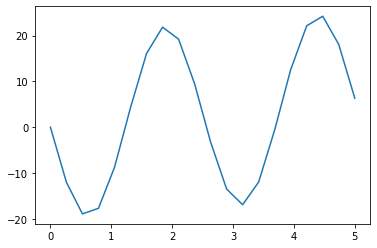

In [22]:
plt.plot(x, fx)
plt.show()

In [23]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [30]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)

print('Параметры a, b - {}'.format(result.x))

Параметры a, b - [ 3.  -2.5]


Задание 4¶


Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [26]:
rand_array = np.random.randint(low=1, high=20, size=20)
rand_array

array([12, 16, 18,  8,  7, 17, 19,  6, 19, 13,  4,  8, 10, 18,  8,  6,  5,
        3,  7,  3])

In [27]:
total_array = np.array([])
total_mean = []
for i in range(1000):
    new_array = np.random.choice(rand_array, 50)
    total_array = np.concatenate((total_array, new_array), axis=None)
    total_mean.append(new_array.mean())

print(total_array)
print(total_mean[0:15])

[ 8.  7.  6. ...  8. 19.  8.]
[10.02, 8.76, 11.1, 9.76, 9.48, 10.04, 10.14, 10.08, 9.38, 10.46, 9.84, 10.18, 11.24, 9.34, 11.06]


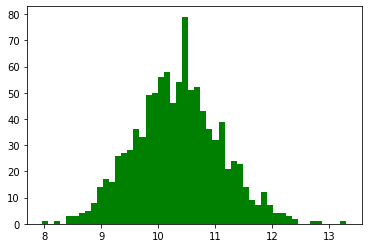

In [28]:
plt.hist(total_mean, 50,  color='g')
plt.show()

Задание 5


Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [29]:
z = np.array([[1, 4],
              [1, 1]])
v, vec = np.linalg.eig(z)
print(f'собственные значения\n {v},\n\nсобственные вектора \n{vec}')

собственные значения
 [ 3. -1.],

собственные вектора 
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


решаем уравнение 

$(1-λ)(1-λ) - 4 = 0$

$λ^2 - 2*λ - 3 = 0$

cобственные значения:  

$λ1 = 3$ и 

$λ2 = -1$

собственный вектор №1 

из уравнений 

$-2x + 4y = 0$   

и   

$x - 2y = 0$

$x = 2y$

$\begin{pmatrix}2 \\ 1\end{pmatrix} $ 




собственный вектор №2 

из уравнений 

$2x + 4y = 0$    

и    

$x + 2y = 0$


$x = -2y$


$\begin{pmatrix} -2 \\ 1\end{pmatrix} $ 